In [26]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

import numpy as np
np.random.seed(0)
import random
import json
import pandas as pd
from datetime import datetime, timedelta

import pickle
import requests
from urllib.parse import urlencode
from sklearn.preprocessing import LabelEncoder
import json

# Visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs

from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from tqdm import tqdm, tqdm_notebook
from sklearn.metrics import accuracy_score, precision_score


In [510]:

import random

chinese_words = [
    "胸", "胸罩", "休闲", "休闲中心", "休闲服装", "空闲", "空闲时间", "虚心", 
    "宣布", "宣传", "学历", "学术", "学问", "寻找", "训练", "迅速", 
    "押金", "严肃", "延长", "演讲", "宴会", "痒", "腰酸背痛", "意外",
    "摇", "咬", "业务", "业余", "夜晚", "依然 （VS衣服)", "一律", "一再", "一致", 
    "移动", "移民", "遗憾", "乙", "以来", "义务", "亿", "意外"]


chinese_words = ['洞'
                    # , '铜', '筒', '时尚', '尚', '躺', '倘若', '倘', '话筒', '井冈山', '互联网', '岗位', '岗', '刚', '提纲', '钢铁'
                    #  , '商', '南', '献', '贡献', '内', '丙', '病', '纳', '祸', '锅', '肉', '窝', '归纳', '惹祸', '俩', '寓', '偶'
                    #  , '遇', '愚', '偶尔', '遇到', '愚蠢', '愚昧', '禹', '属', '嘱', '金属', '嘱咐', '叮嘱', '属于', '家属'
                    #  , "扁", "篇", "遍", "偏", "骗", "闯", "扁", "篇", "遍", "偏", "骗", "间", "简", "闻", "闪电", "闪", "闪烁", "闭"
                     , "关闭", "闹", "无理取闹", "阔", "闰","润", "新闻", "争", "静", "净", "挣", "睁", "竞争", "战争", "争论", "争取", "冷静", "平静", "眼睛睁不开"
                    #  , "刍", "急", "隐", "稳", "隐私", "稳定", "趋", "趋势", "皱纹", "皱", "昆", "混", "混乱", "昆虫", "混浊", "漫", "慢", "曼"
                    #  , "昌", "晶", "唱歌", "倡", "提倡", "倡导", "倡议"
                    #  , '昔', '措施', '采取措施', '腊', '猎', "打猎", '希腊', '惜', '爱惜', '可惜', '珍惜', '借鉴', '借助', '借口', '借', '借', '从图书馆借书', '能借我点儿钱吗'
                    #  , '其他国家的工业政策，我们可以借鉴一二', '漠', '冷漠', '摸', '模', '模仿', '模仿', '莫', '桌', '旲', '曾经', '增加', '与日俱增'
                    #  , '我们迟早会成功的', '辞掉', '卖掉', '删掉', '朝', '潮', '韩', '朝鲜'
                     , '旦', '查', '但', '担', '坦', '量', '胆', '恒', '宣', '一旦', '元旦', '检查', '调查', '但是', '不但…而且…', '承担', '承担责任'
                     , '担任', '坦率', '商量', '数量', '质量', '胆小鬼', '胆怯', '永恒', '宣布', '宣传'
                     , '怕', '恐怕', '可怕', '伯', '伯母', '阿拉伯', '伯伯', '迫切', '迫', '柏', '柏林', '拍', '皇后', '皇帝', '皇', '皆', '帕', '手帕', '帛', '锦', '棉', '绵', '锦江', '棉花', '海绵'
                     , '坦白', '蛋白质', '佰', '缩', '宿', '宿舍', '缩短', '压缩', '陌', '陌生', '老百姓']

random_word = random.choice(chinese_words)
print(random_word)


棉花


In [2]:
# REMOVE FEATURES AND DUMMIFY SEQUENCES 

df = pd.read_csv("C:/Users/Win11/Downloads/paying_mat14_totalmat_50.csv")

# df = df[df['matuirity_day'] == 6]

print(df.shape)
df.head(4)

def data_processing(df): 

    df['max_payment']               = df['max_payment']     / df['spent_to_date']
    df['max_daily_spent']           = df['max_daily_spent'] / df['spent_to_date']
    df['day_1_count_payment']       = (df['daily_payment_history_count'].apply(lambda x: x.replace('[', '').replace(']', '').split(',')[0])).astype(float)
    df['day_1_total_payment']       = (df['daily_spent_history_count'].apply(lambda x: x.replace('[', '').replace(']', '').split(',')[0])).astype(float)

    df = df[df['day_1_total_payment'] > 0]

    # df['d2_4_total_payment_rel']    = (df['daily_spent_history_count'].apply(lambda x: float(x.replace('[', '').replace(']', '').split(',')[1]) + float(x.replace('[', '').replace(']', '').split(',')[2]) + float(x.replace('[', '').replace(']', '').split(',')[3]))).astype(float)
    # df['d4_7_total_payment_rel']    = (df['daily_spent_history_count'].apply(lambda x: float(x.replace('[', '').replace(']', '').split(',')[4]) + float(x.replace('[', '').replace(']', '').split(',')[5]) + float(x.replace('[', '').replace(']', '').split(',')[6]))).astype(float)
    # df = df[df['d2_4_total_payment_rel'] > 0]

    # df['d4_7_total_payment_rel']    = df['d4_7_total_payment_rel'] / (df['d2_4_total_payment_rel'])
    # df['d2_4_total_payment_rel']    = df['d2_4_total_payment_rel'] / (df['day_1_total_payment'])
    # max_value = df[df['day_1_total_payment'] > 0]['d2_4_total_payment_rel'].max()
    # df.loc[df['day_1_total_payment'] > 0, 'd4_7_total_payment_rel'] = df.loc[df['day_1_total_payment'] > 0, 'd4_7_total_payment_rel'].clip(upper = max_value)

    df['max_games_daily_games'] = df['max_games_daily_games'] / df['games_to_date']
    df['daily_games_first_1d']  = df['daily_games_first_1d']  / df['games_to_date']

    df['games_to_date']         = df['local_time_before_6'] + df['local_time_6_to_12'] + df['local_time_12_to_18'] + df['local_time_after_18'] 
    df['local_time_before_6']   = df['local_time_before_6'] / df['games_to_date']
    df['local_time_6_to_12']    = df['local_time_6_to_12']  / df['games_to_date']
    df['local_time_12_to_18']   = df['local_time_12_to_18'] / df['games_to_date']
    df['local_time_after_18']   = df['local_time_after_18'] / df['games_to_date']
    
    df['win_spent_ratio']       = df['win_amount_to_date']  / (df['spent_to_date']+0.0001)
    
    # Retention 
    df['full_[retention]']      = df['retention_sequence'].apply(lambda x: x[-2])
    df['full_pay_[retention]']  = df['daily_payment_history_binary'].apply(lambda x: x[-2])

    return df
df = data_processing(df)

# Base Cols
cols = [
        # 'paying_matuirity', 'spent_to_date', 'spent_last_14d',  'spent_last_7d', 'max_daily_spent'
        'paying_matuirity', 'spent_to_date','max_daily_spent'
        
        # , 'max_payment', 'payments_last_14d', 'payments_last_7d',  'payments_to_date',  'minutes_to_payment', 'minutes_to_pay_since_first_game'
        , 'max_payment', 'payments_to_date',  'minutes_to_payment', 'minutes_to_pay_since_first_game'
        
        # , 'games_last_14d', 'games_last_7d', 'games_to_date', 'max_games_daily_games', 'daily_games_first_14d', 'daily_games_first_7d', 'daily_games_first_1d', 'minutes_to_play'
        , 'games_to_date', 'max_games_daily_games', 'daily_games_first_1d', 'minutes_to_play'
        
        # , 'money_games_to_date', 'bet_money_to_date', 'max_bet',  'money_games_last_14d', 'money_games_last_7d'
        , 'money_games_to_date', 'bet_money_to_date', 'max_bet'

        # , 'win_amount_to_date',  'win_amount_last_14d', 'win_amount_last_7d'
        , 'win_amount_to_date'
        
        , 'minutes_to_withdraw_since_first_payment', 'withdrawn_attempted_ammount_to_date', 'withdrawn_attempt_to_date'
        
        , 'local_time_before_6', 'local_time_6_to_12', 'local_time_12_to_18', 'local_time_after_18'
        ]

columns_of_interest = ['retention_sequence', 'days_betting_money_sequence', 'days_50_usd_bet_money_sequence', 'daily_payment_history_binary']  # Add additional columns here if needed
def truncate_list(lst):
    return lst[-14:]
for column in columns_of_interest:
    df[column] = df[column].apply(truncate_list)

# II. Execute the dummification
columns_info = {'retention_sequence': 'playing_days_'
                # , 'money_bet_sequence': 'money_bet_'
                , 'daily_payment_history_binary': 'payer_'
                # , 'daily_payment_history_count': 'pay_'
                , 'days_betting_money_sequence': 'days_bet_'
                , 'days_50_usd_bet_money_sequence': 'days_gt50_bet_'
                # , 'province': 'province_'
                }  # Add additional columns and identifiers here if needed

dummy_variable_list = []  # List to store dummy variables generated for each column

for column, identifier in columns_info.items():
    # Calculate sum of 'new_disputer_30d' for each unique value in the column
    sum_disputer = df.groupby(column)['new_disputer_30d'].sum()
    # Filter unique values where sum is >= 12
    valid_values = sum_disputer[sum_disputer >= 15].index.tolist()
    # Generate dummy variables for valid values
    dummy_variables = pd.get_dummies(df[column].loc[df[column].isin(valid_values)], prefix=identifier).astype(int)
    dummy_variable_list.append(dummy_variables)
    df = pd.concat([df, dummy_variables], axis=1)

# Concatenate all dummy variables into a single DataFrame
final_dummy_variables = pd.concat(dummy_variable_list, axis=1)
cols = cols + list(final_dummy_variables.columns)

# III. Can remove extra items
items_to_remove = ['working_hours_bets_to_date', 'minutes_to_withdraw_since_first_payment', 'withdrawn_attempted_ammount_to_date', 'withdrawn_attempt_to_date', 'province']
cols = [item for item in cols if item not in items_to_remove]
final_dummy_variables.columns

# df = df[df['day_1_total_payment'] < 500]

(628765, 55)


Index(['playing_days__0,0,0,0,0,0,0]', 'playing_days__1,0,0,0,0,0,0]',
       'playing_days__1,0,1,1,1,1,1]', 'playing_days__1,1,0,0,0,0,0]',
       'playing_days__1,1,0,1,1,1,1]', 'playing_days__1,1,1,0,0,0,0]',
       'playing_days__1,1,1,0,1,1,1]', 'playing_days__1,1,1,1,0,1,1]',
       'playing_days__1,1,1,1,1,0,1]', 'playing_days__1,1,1,1,1,1,0]',
       'playing_days__1,1,1,1,1,1,1]', 'playing_days__[1,0,0,0,0,0]',
       'playing_days__[1,0,0,0,0]', 'playing_days__[1,0,0,0]',
       'playing_days__[1,0,0]', 'playing_days__[1,0,1]', 'playing_days__[1,0]',
       'playing_days__[1,1,0,0]', 'playing_days__[1,1,0]',
       'playing_days__[1,1,1,1,1,1]', 'playing_days__[1,1,1,1,1]',
       'playing_days__[1,1,1,1]', 'playing_days__[1,1,1]',
       'playing_days__[1,1]', 'payer__0,0,0,0,0,0,0]', 'payer__1,0,0,0,0,0,0]',
       'payer__1,0,1,1,1,1,1]', 'payer__1,1,0,0,0,0,0]',
       'payer__1,1,1,0,1,1,1]', 'payer__1,1,1,1,1,1,0]',
       'payer__1,1,1,1,1,1,1]', 'payer__[1,0,0,0,0,0]

In [16]:
import pandas as pd

def analyze_cases(data):
    # Define cases
    cases = {
        'case1': data[data['day_1_total_payment'] >= 500],
        'case2': data[(data['day_1_total_payment'] <= 100) & (data['d2_4_total_payment_rel'] >= 15)],
        'case3': data[((data['day_1_total_payment'] > 100) & (data['day_1_total_payment'] <= 200)) & (df['d2_4_total_payment_rel'] >= 7)],
        'case4': data[(data['day_1_total_payment'] > 200) & (df['d2_4_total_payment_rel'] >= 4)]
    }
    
    # Compute metrics for each case
    case_metrics = {}
    for case, data in cases.items():
        avg_dispute = data['new_disputer_30d'].mean()
        total_rows = len(data)
        total_dispute = data['new_disputer_30d'].sum()
        case_metrics[case] = (avg_dispute, total_rows, total_dispute)
    
    return case_metrics

# Example usage:
result = analyze_cases(df)
result

KeyError: 'd2_4_total_payment_rel'

In [133]:
data = pd.read_csv("C:/Users/Win11/Downloads/20240522_075352_07069_zuvz4.csv")
data

,disputers,users,users_verification,game_types,binge_gaming,monetary_consumption_score,user_withdrawed,fluctuating_wagers,payment_methods_score,payment_impulsiveness_score,nightly_play,days_played_score,increasing_tolerance,losses_of_winning_score,time_comsumption
0,Non disputers,57068,3375,0.559035,0.046904,0.511153,0.042125,0.000374,0.105041,0.496494,0.333974,0.406385,NaN,0.2,NaN
1,Disputers,167,1,0.747904,0.005928,0.857305,0.005988,0.000000,0.140778,0.419162,0.282036,0.540719,NaN,0.3,NaN


In [134]:
data[data.columns[3:]].iloc[0].tolist()

[0.5590348356346879,
 0.0469035186093782,
 0.5111528352141292,
 0.0421251839910282,
 0.0003740157480314,
 0.1050413541739744,
 0.4964938319198166,
 0.3339735052919399,
 0.4063853648279535,
 nan,
 0.2,
 nan]

In [144]:
import plotly.graph_objects as go

# Components and features
variables = ['Game types', 'Increasing tolerance', 'Repeated loss of winning', 
              'Binge gambling', 'Loss chasing', 'Monetary consumption', 
              'Cancelled withdrawals', 'Fluctuating wagers', 'Payment methods', 
              'Impulsive transaction behavior', 'Nightly play', 'Number of days played', 
              'Time consumption']

# Sample data (replace with actual data)
data = {
    'Median user': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
    'Disputer': [0.4, 0.6, 0.3, 0.92, 0.4, 0.7, 0.6, 0.5, 0.6, 0.7, 0.4, 0.6, 0.8]
}

data = pd.read_csv("C:/Users/Win11/Downloads/20240522_075352_07069_zuvz4.csv")
data = data.drop(columns=['increasing_tolerance', 'time_comsumption', 'fluctuating_wagers'])

variables = data.columns[3:]
reference_value = 0.5

for col in variables:
    if col != 'game_id' and col != 'game_id_normalized':  # Skip already normalized and first column
        data[col] = reference_value * (data[col] / data[col].iloc[0])

data = {
    'Median user': data[data.columns[3:]].iloc[0].tolist(),
    'Disputer': data[data.columns[3:]].iloc[1].tolist()
}


fig = go.Figure()

for player, values in data.items():
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=variables,
        fill='toself',
        name=player
    ))

fig.update_layout(
    title='Player Profile: Association with Higher Dispute Rates',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-0.1, 0.9]  # Set the range according to your data
        )),
    width=1000,  # Set the width of the plot
    height=800,  # Set the height of the plot
)

fig.show()


In [17]:
import plotly.graph_objects as go

# Features
features = ['Game types ', 'Increasing tolerance ', 'Repeated loss of winning ', 
            'Binge gambling ', 'Loss chasing ', 'Monetary consumption ', 
            'Cancelled withdrawals ', 'Fluctuating wagers ', 'Payment methods ', 
            'Impulsive transaction behavior ', 'Nightly play ', 'Number of days played ', 
            'Time consumption ']

# Importance scores (make up numbers based on perceived importance)
importance_scores = [8.23, 7.1, 6.65, 9.4, 7, 9.03, 8.09, 7.44, 6.53, 8.12, 6.32, 7.25, 9]

# Sort features by importance scores
features_sorted = [x for _, x in sorted(zip(importance_scores, features))]
importance_scores_sorted = sorted(importance_scores)

fig = go.Figure(go.Bar(
    x=importance_scores_sorted,
    y=features_sorted,
    orientation='h'
))

fig.update_layout(
    title='Importance of Features in Predicting Dispute rates',
    xaxis_title='Importance Score',
    yaxis_title='Features',
    width=800,  # Set the width of the plot
    height=600,  # Set the height of the plot
)

fig.show()


# Hypotesis validation

### For users with not outstanding payments on day 1, can we still detect high dispute rates?

In [3]:
# Filter dataframe 
subject_df = df[df['day_1_total_payment'] < 500]
subject_df['spent_to_date'].max()

50594.95

In [4]:
num_cols = ['spent_to_date']

In [5]:
target_column='new_disputer_30d'

def quantile_binning(df, columns, num_quantiles):

    # Get the qauntile for each column. 

    bins_dict = {}
    quantile_columns = {}
    
    for column in columns:
        # Calculate quantile bins
        quantile_labels, quantile_bins = pd.qcut(df[column], num_quantiles, retbins=True, duplicates='drop')
        
        # Remove duplicate values from bin edges
        quantile_bins = sorted(set(quantile_bins))
        
        # Apply binning to the column
        new_column_name = f"{column}_quantile"
        df[new_column_name] = pd.cut(df[column], bins=quantile_bins, labels=quantile_bins[:-1], include_lowest=True).astype(float)
        
        # Store the bins for each column
        bins_dict[column] = quantile_bins
        
        # Store the quantile column names
        quantile_columns[column] = new_column_name
    
    return df, bins_dict, quantile_columns

def quantile_dummies(df, column, quantile_bins):

    # Create dummy variables for each quantile
    for i in range(1, len(quantile_bins)):
        n = round(quantile_bins[i], 3)
        dummy_name = f"{column}_gt_{n}_true"
        df[dummy_name] = (df[column] > quantile_bins[i-1]).astype(int)

    return df

def quantile_dummies_all(df, num_cols, quantile_columns):

    for column in num_cols:
        quantile_column = quantile_columns.get(column)
        if quantile_column:
            quantile_bins = sorted(set(df[quantile_column]))
            quantile_bins = [x for x in quantile_bins if pd.notna(x)]
            df = quantile_dummies(df, column, quantile_bins)
    
    return df

    for column in num_cols:
        quantile_column = quantile_columns.get(column)
        if quantile_column:
            quantile_bins = sorted(set(df[quantile_column]))
            quantile_bins = [x for x in quantile_bins if pd.notna(x)]
            df = quantile_dummies(df, column, quantile_bins)
    return df

# Apply quantile binning and create dummy variables
def process_data(df, num_cols, num_quantiles):
    subject_df, bins_dict, quantile_columns = quantile_binning(df, num_cols, num_quantiles)
    subject_df = quantile_dummies_all(subject_df, num_cols, quantile_columns)
    return subject_df

# Group by unique values in 'pay_maturity' column and concatenate results
def group_and_concat(df, cols, target_column):

    return final_df

    
unique_pay_maturity_values = df['paying_matuirity'].unique()
result_dfs = []

for value in tqdm(unique_pay_maturity_values):
    subset_df = df[df['paying_matuirity'] == value]
    subject_df, bins_dict, quantile_columns = quantile_binning(df, num_cols, num_quantiles = 4)
    subject_df = quantile_dummies_all(subject_df, num_cols, quantile_columns)
    sequence_cols = [col for col in subject_df.columns if col.endswith(']')]
    quantile_col_ok = [col[:-5] for col in subject_df.columns if col.endswith('_true')]
    subject_df.columns = [col[:-5] if col.endswith('_true') else col for col in subject_df.columns]
    # # cols_2 = list(quantile_col_ok) + list(sequence_cols)
    cols_2 = list(quantile_col_ok) #+ list(sequence_cols)

    grouped_dfs = []
    for col in cols: 
        grouped = df.groupby(col)[target_column].agg(['sum', 'count', 'mean']).reset_index()
        grouped = grouped.rename(columns={grouped.columns[0]: 'C_1'})
        grouped['C_1'] = grouped['C_1'].apply(lambda x: col + '_' + str(int(x)))
        grouped_dfs.append(grouped)
    result_df = pd.concat(grouped_dfs)
    result_df.insert(1, 'C_2', np.nan)
    result_df.insert(2, 'C_3', np.nan)
    result_df['C_1'] = result_df['C_1'].str.replace('_true_', '_')
    result_df.reset_index(drop=True, inplace=True)
    result_df['paying_matuirity'] = value
    result_dfs.append(result_df)

# Call the function with your DataFrame
result_df.head()


  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [01:04<00:00,  4.98s/it]


,C_1,C_2,C_3,sum,count,mean,paying_matuirity
0,paying_matuirity_1,NaN,NaN,192,35389,0.005425,13
1,paying_matuirity_2,NaN,NaN,185,35378,0.005229,13
2,paying_matuirity_3,NaN,NaN,173,35365,0.004892,13
3,paying_matuirity_4,NaN,NaN,165,35354,0.004667,13
4,paying_matuirity_5,NaN,NaN,150,34922,0.004295,13


In [ ]:
result_df = result_df[result_df['C_1'].str.endswith('1')]
result_df['C_1_num'] = (result_df['C_1'].str.split('_').apply(lambda x: x[-2]).astype(float)).apply(lambda x: round(x,1))


In [15]:
result_df[result_df['paying_matuirity'] == 1]

,C_1,C_2,C_3,sum,count,mean,paying_matuirity


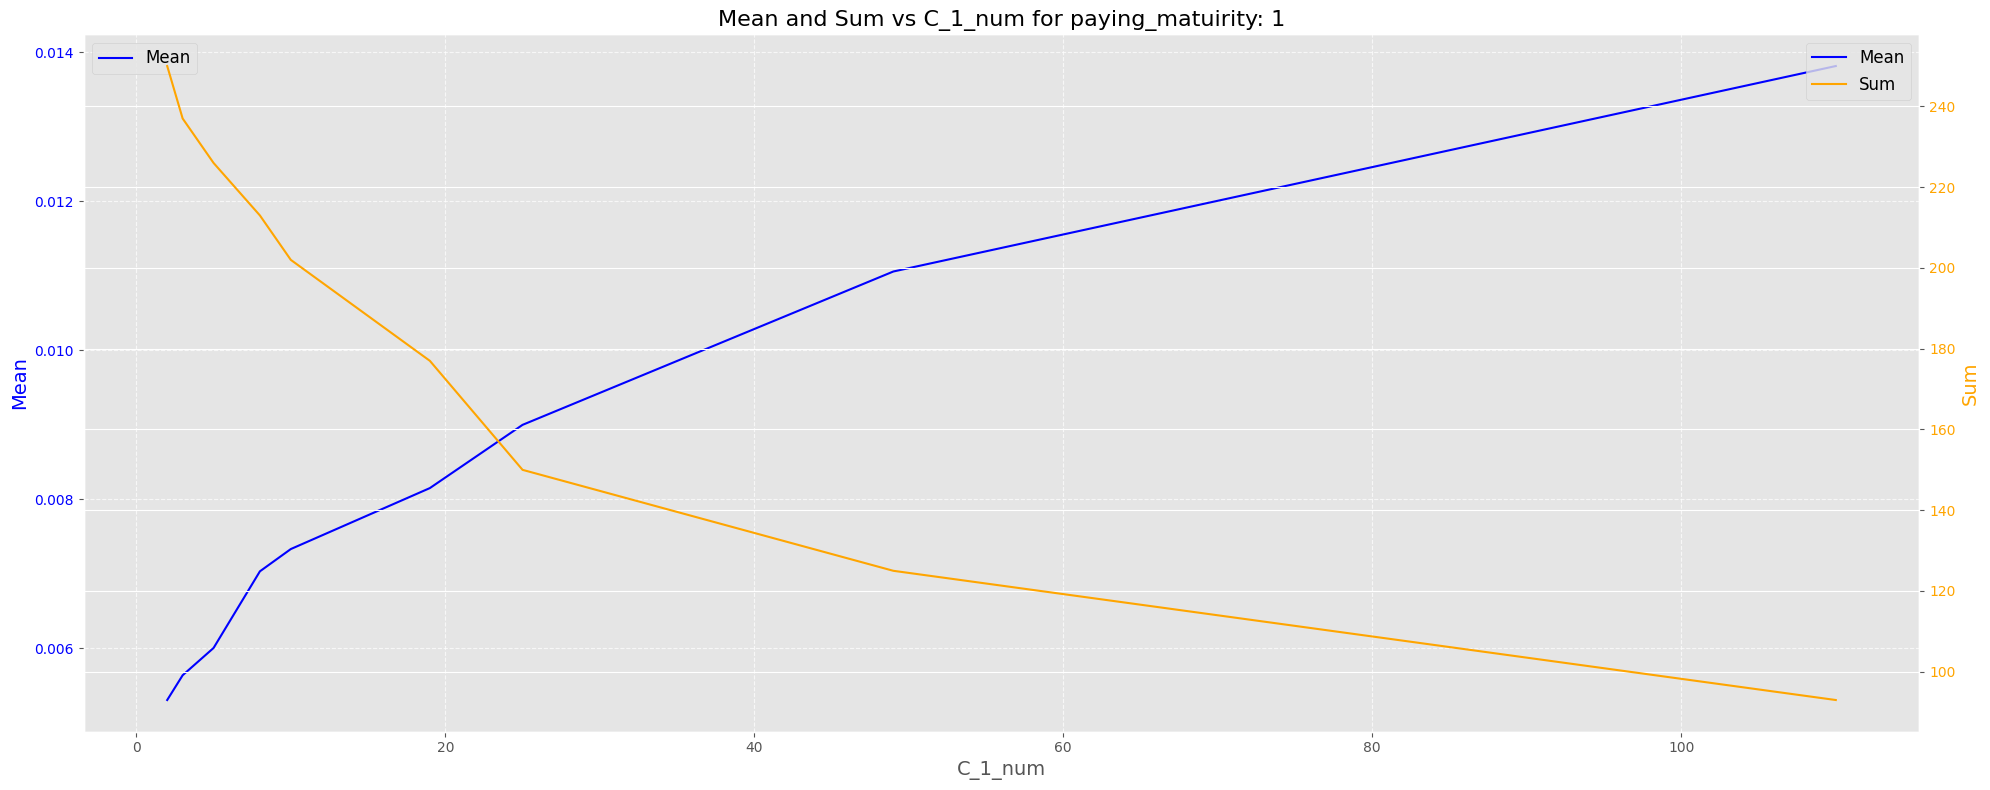

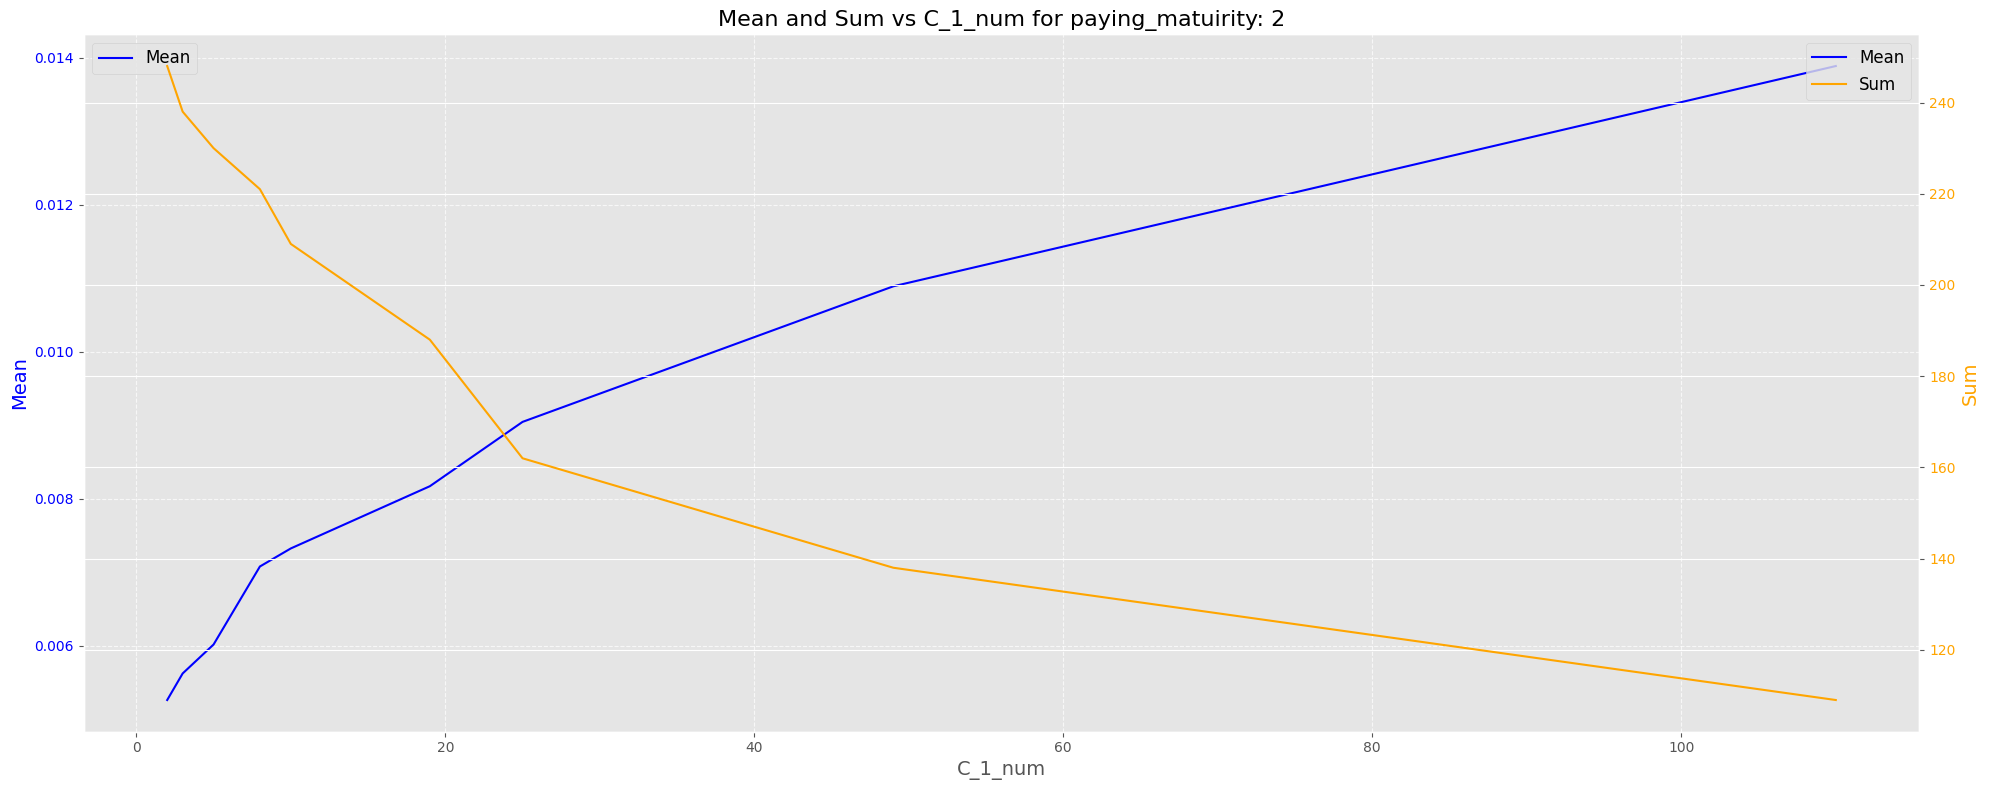

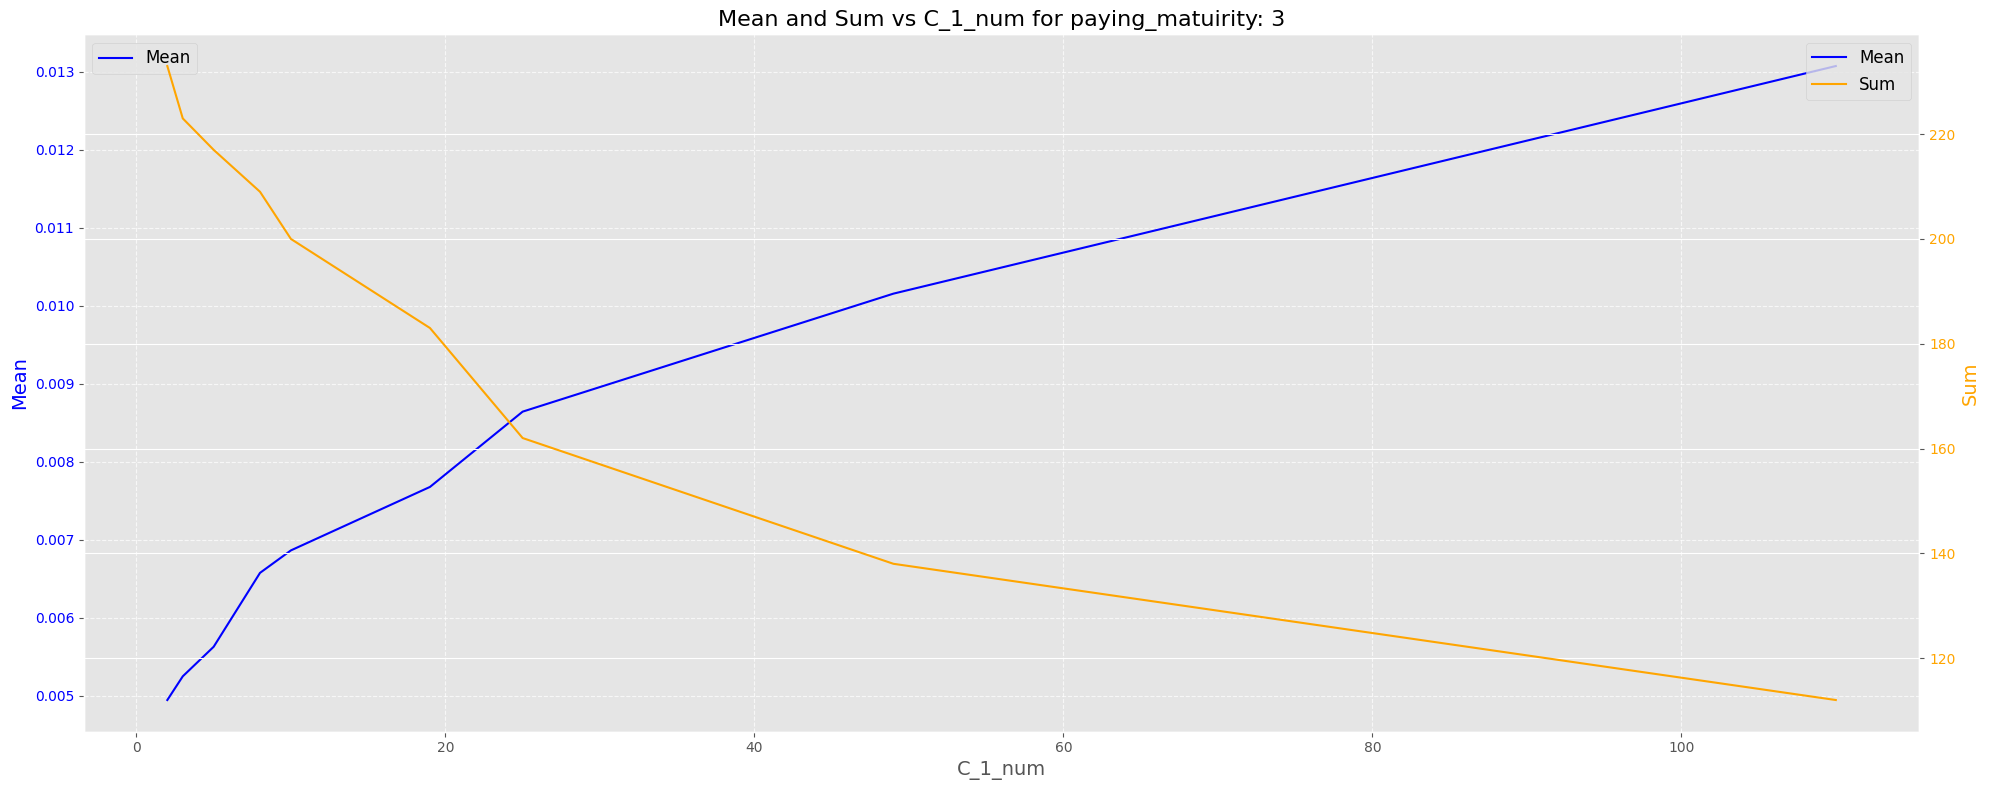

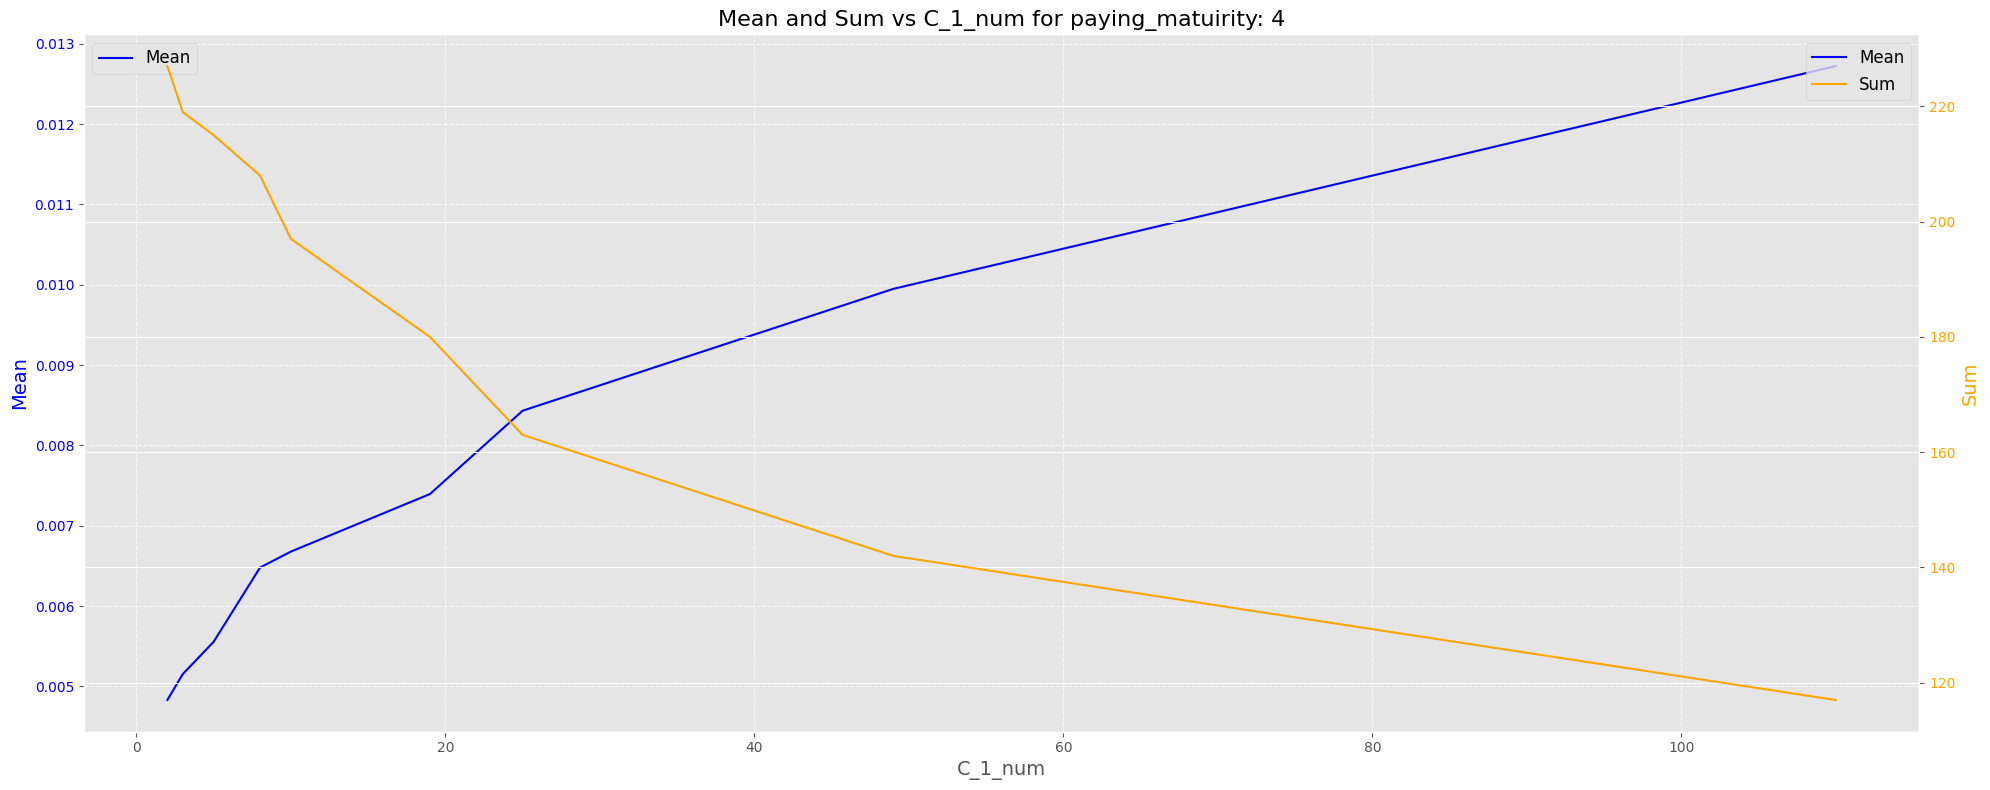

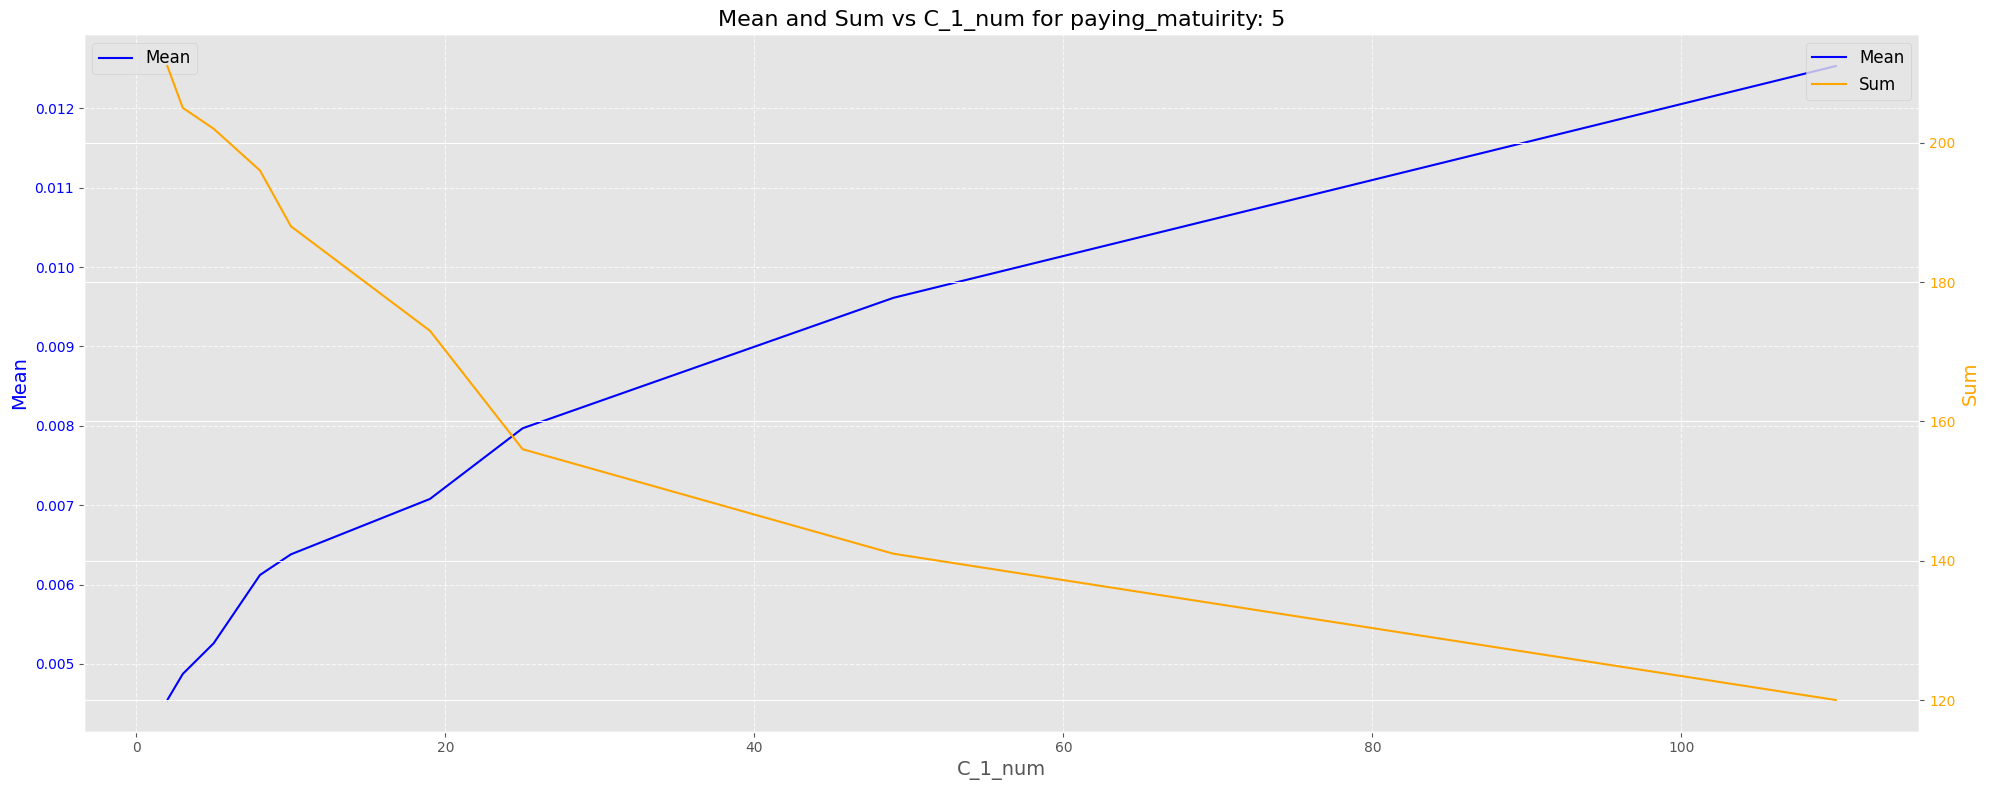

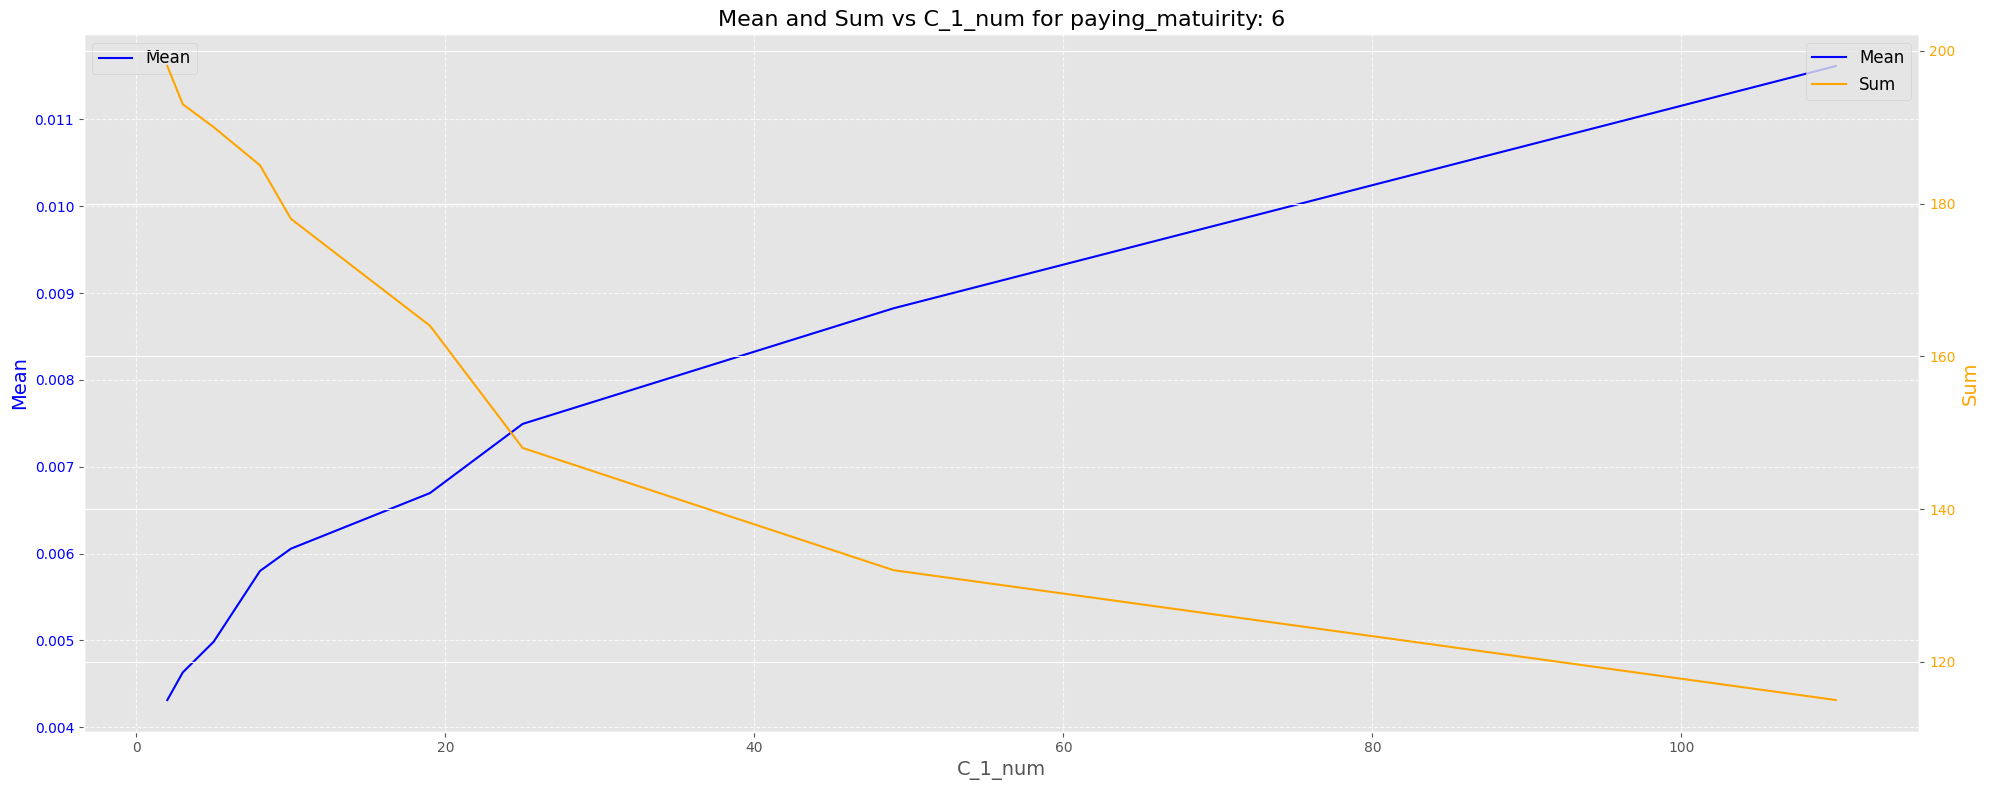

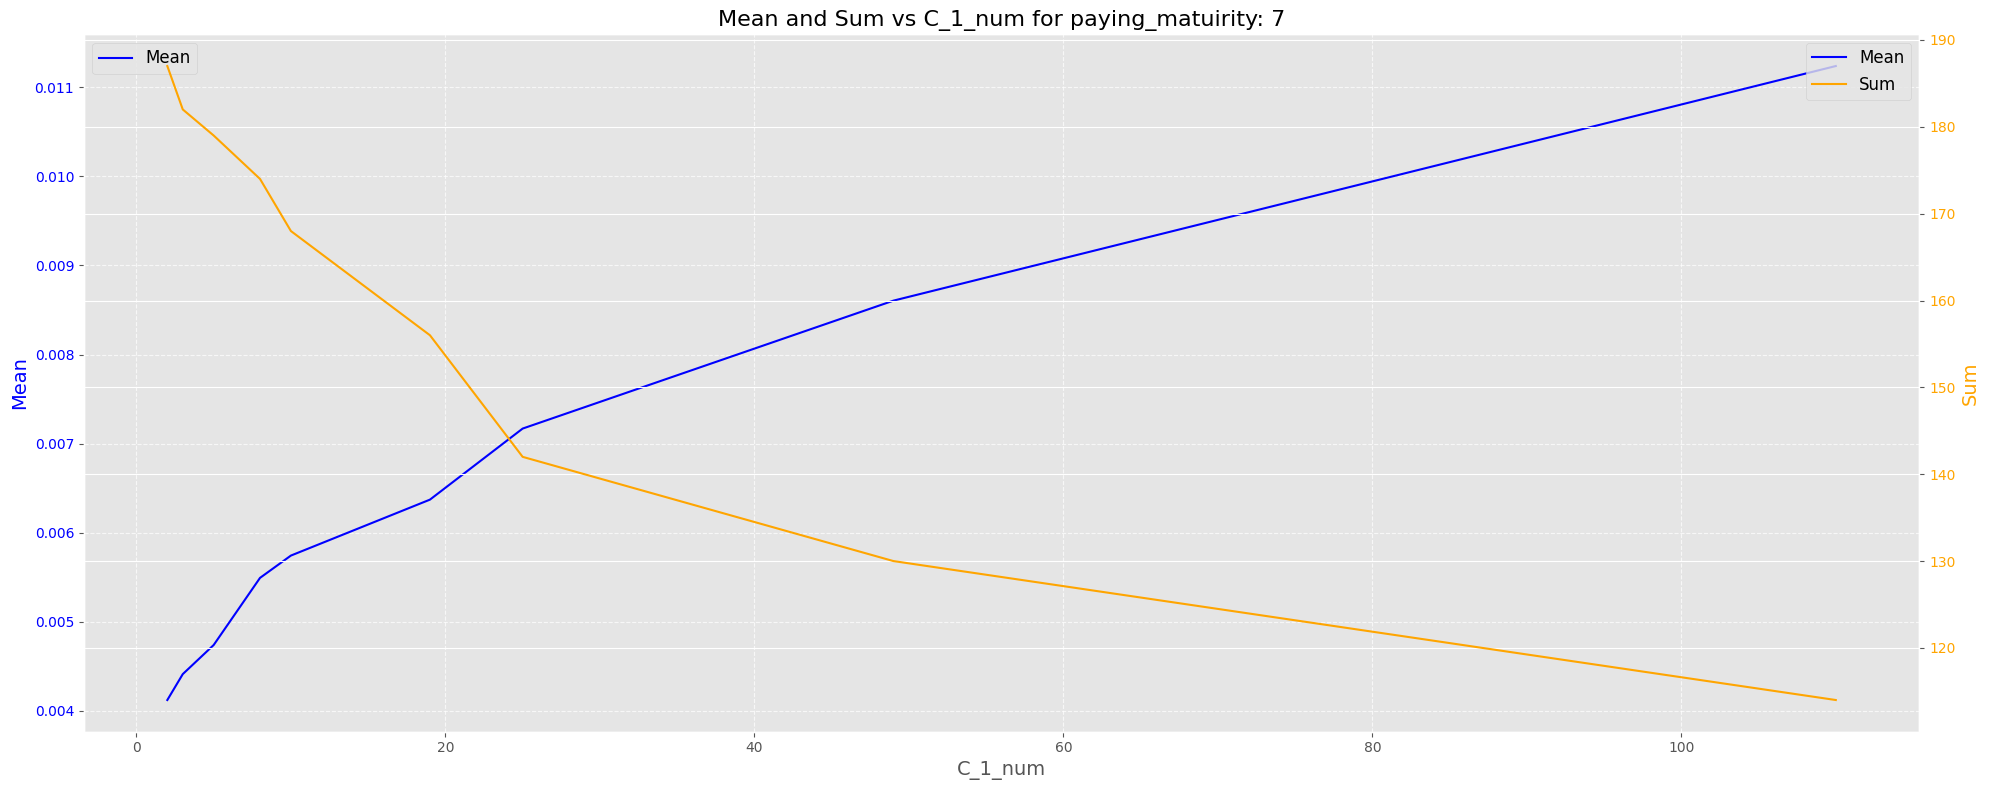

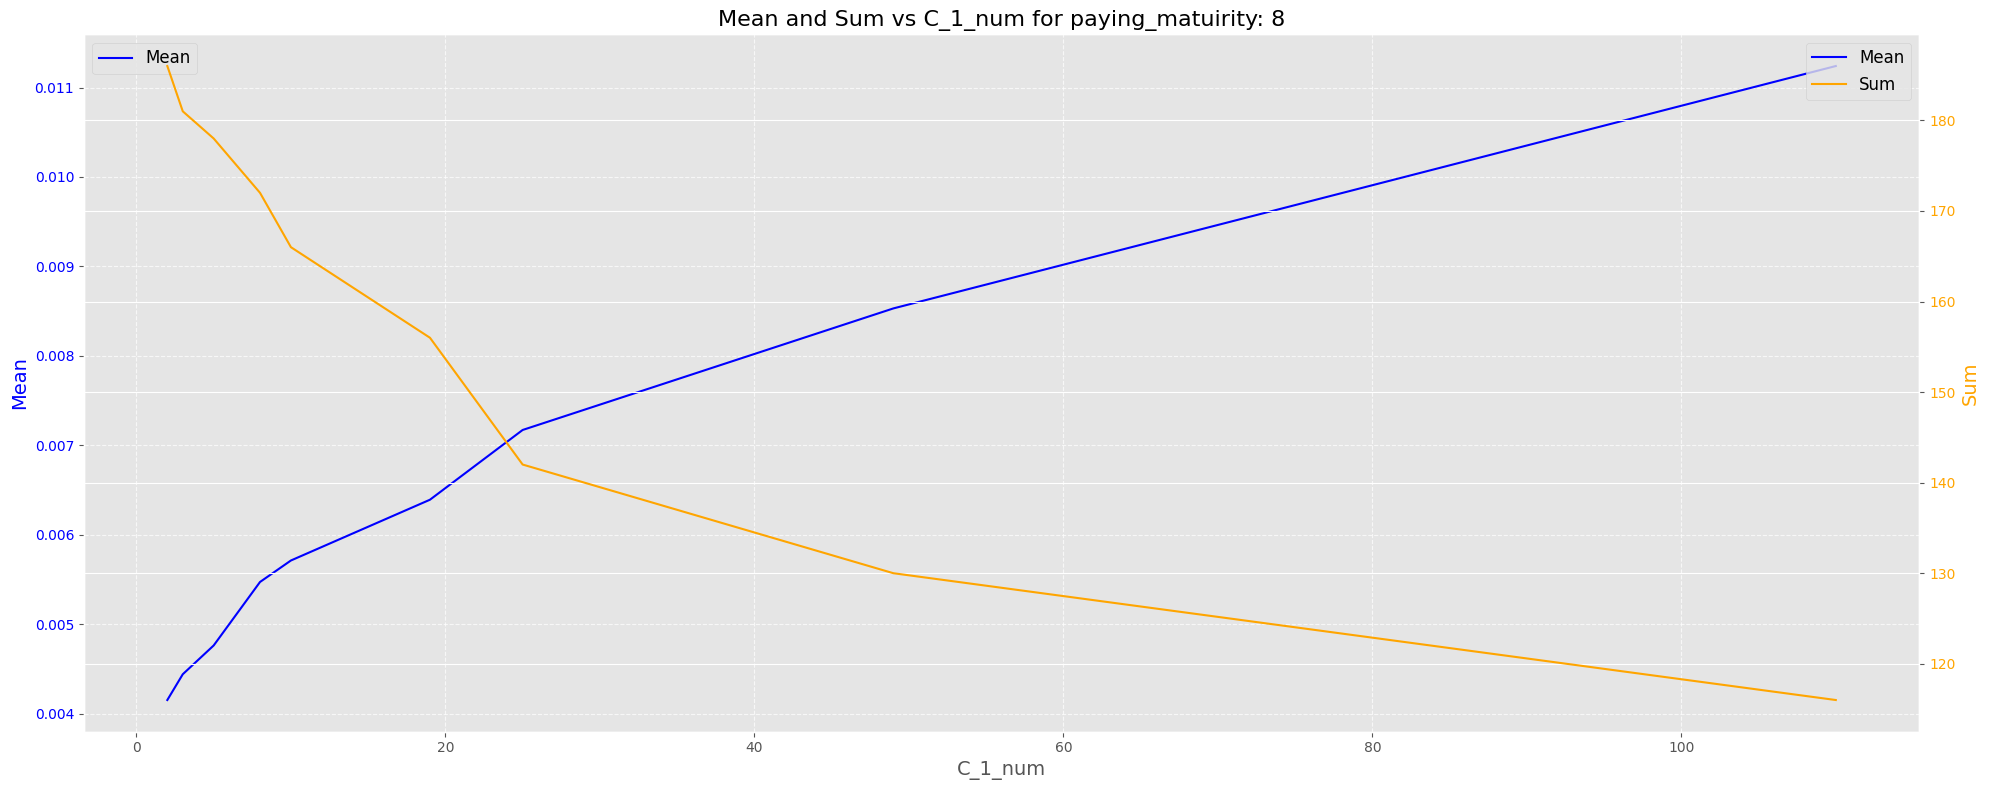

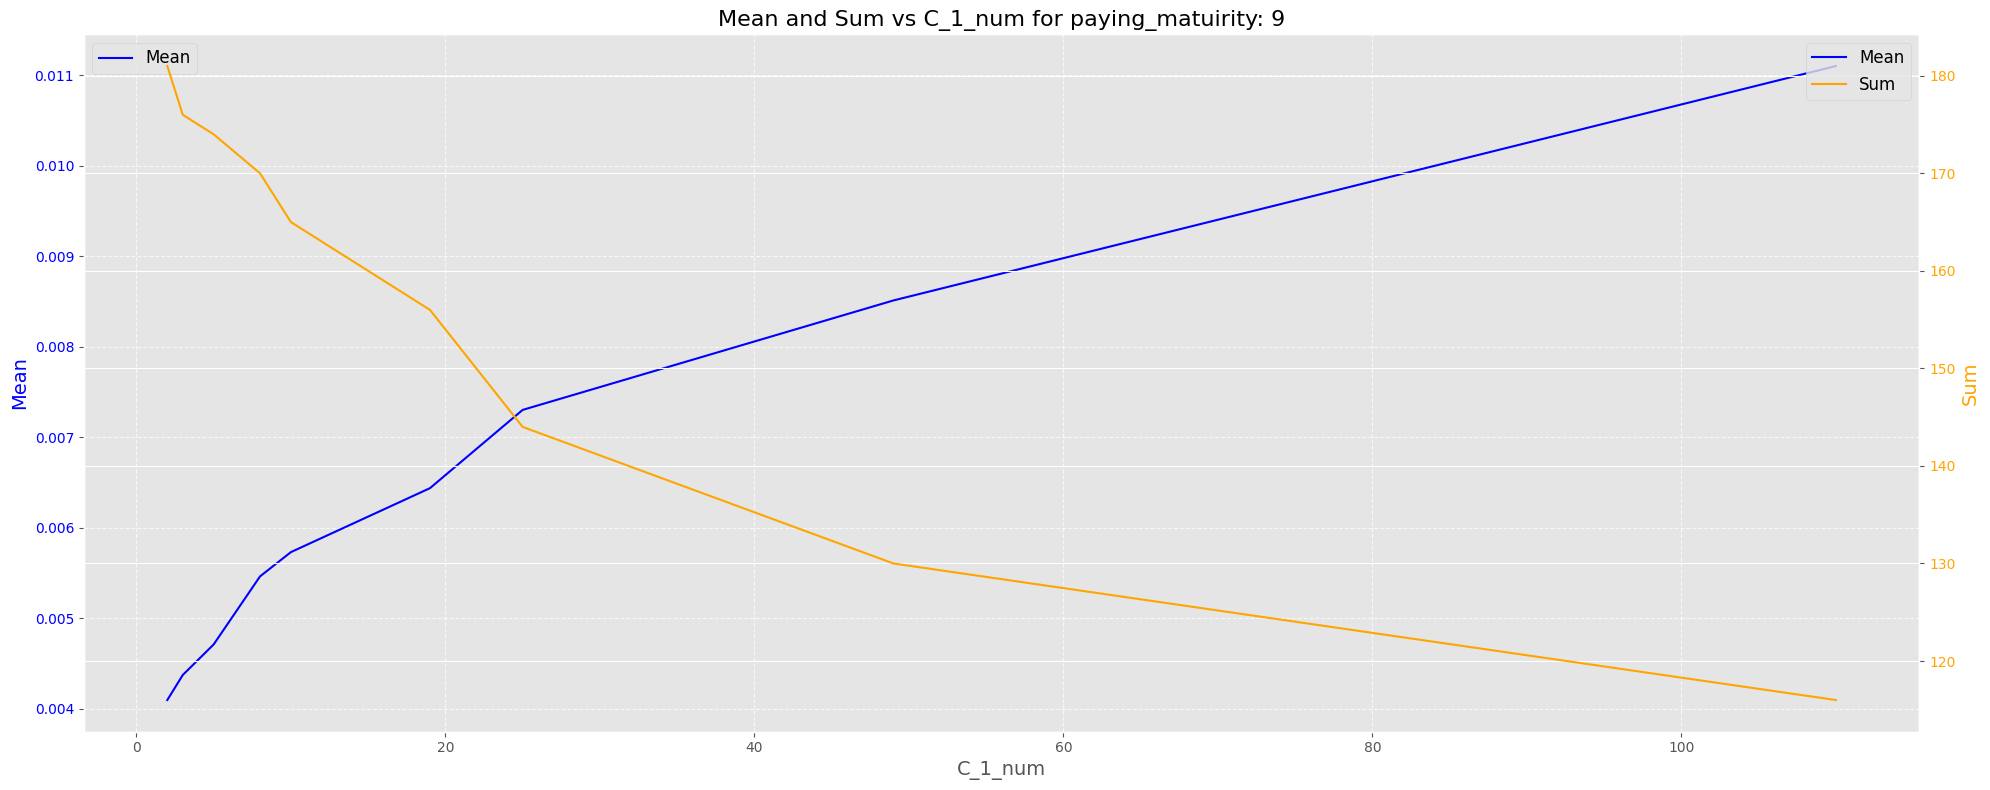

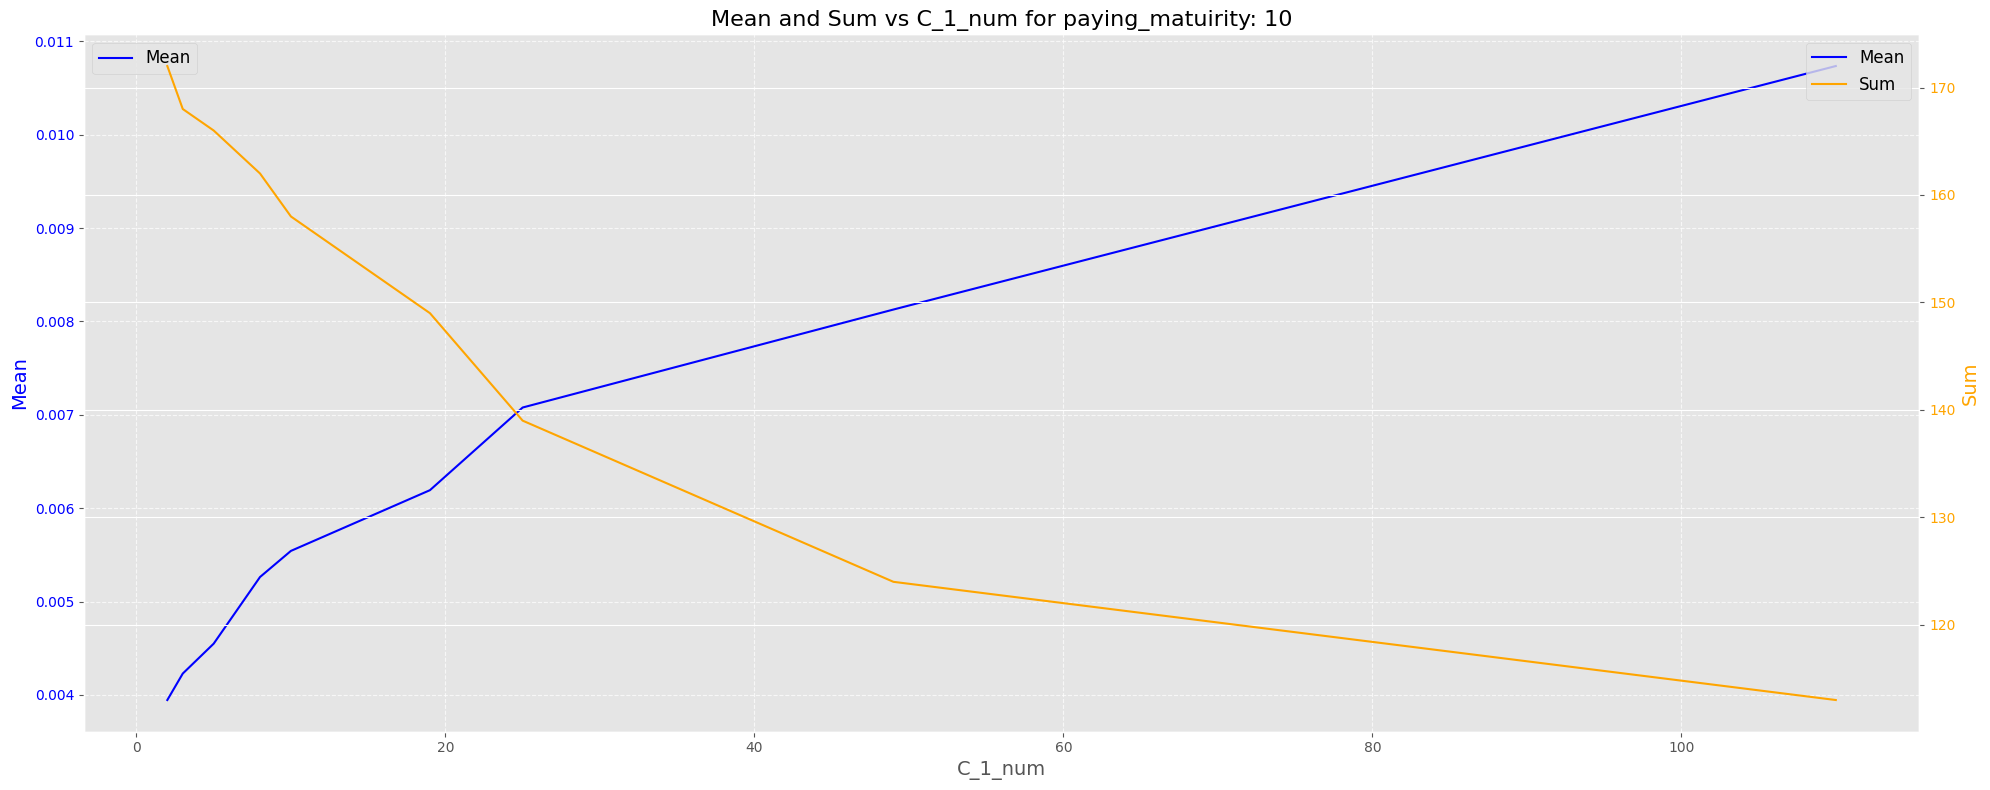

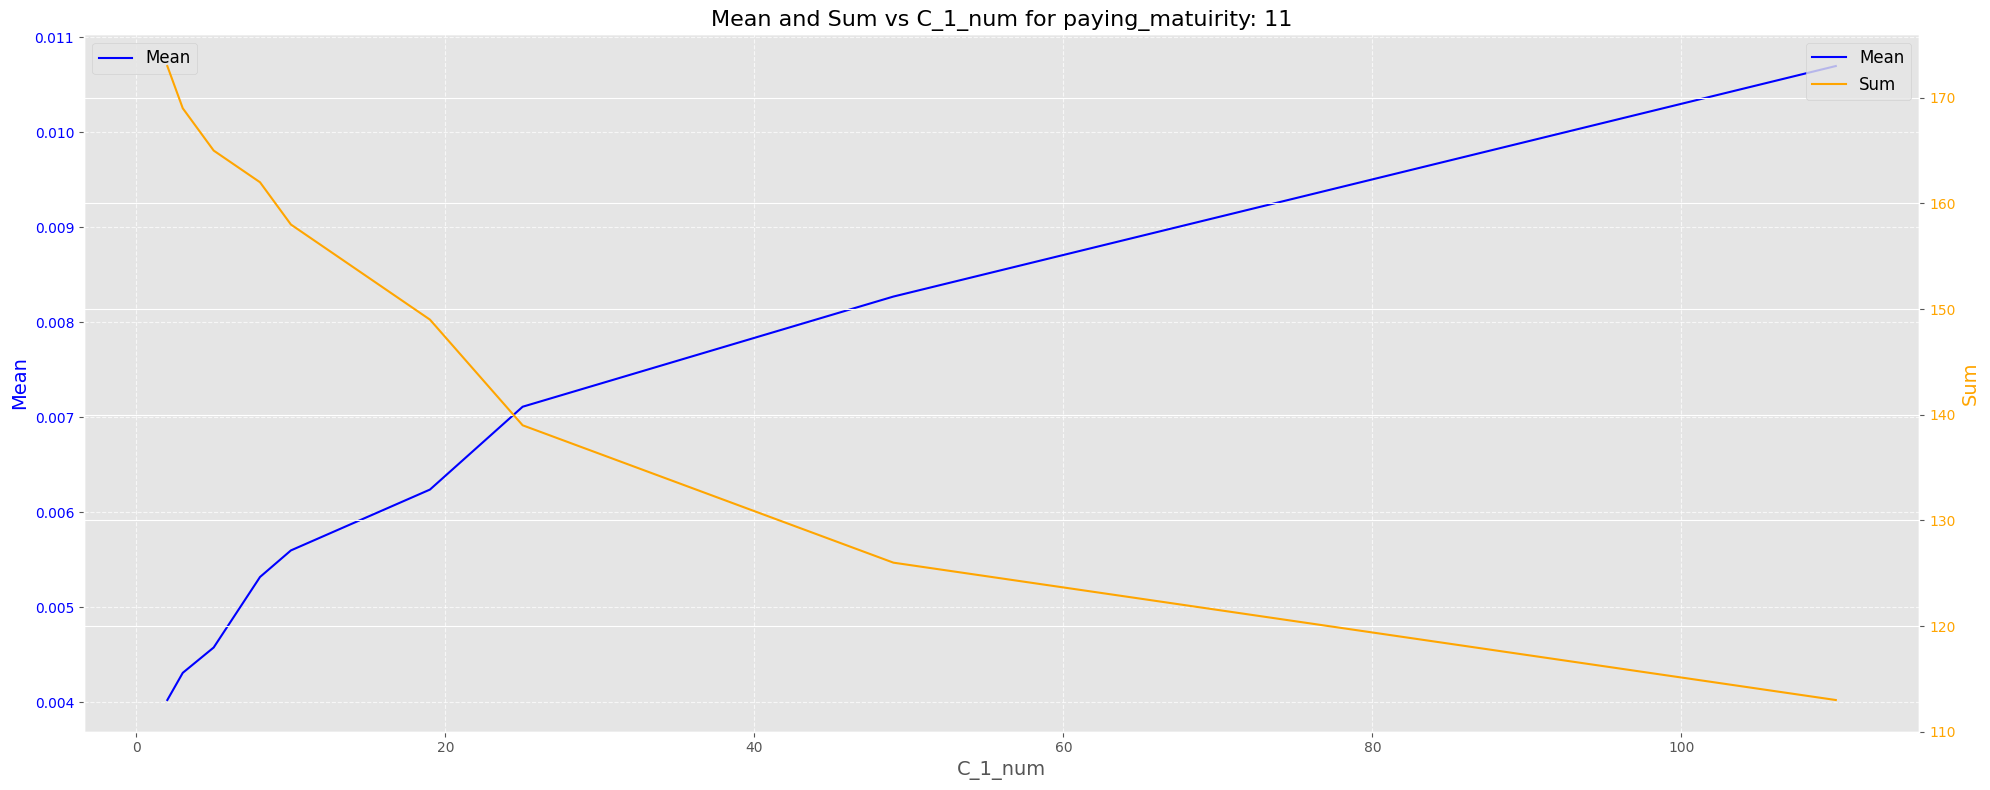

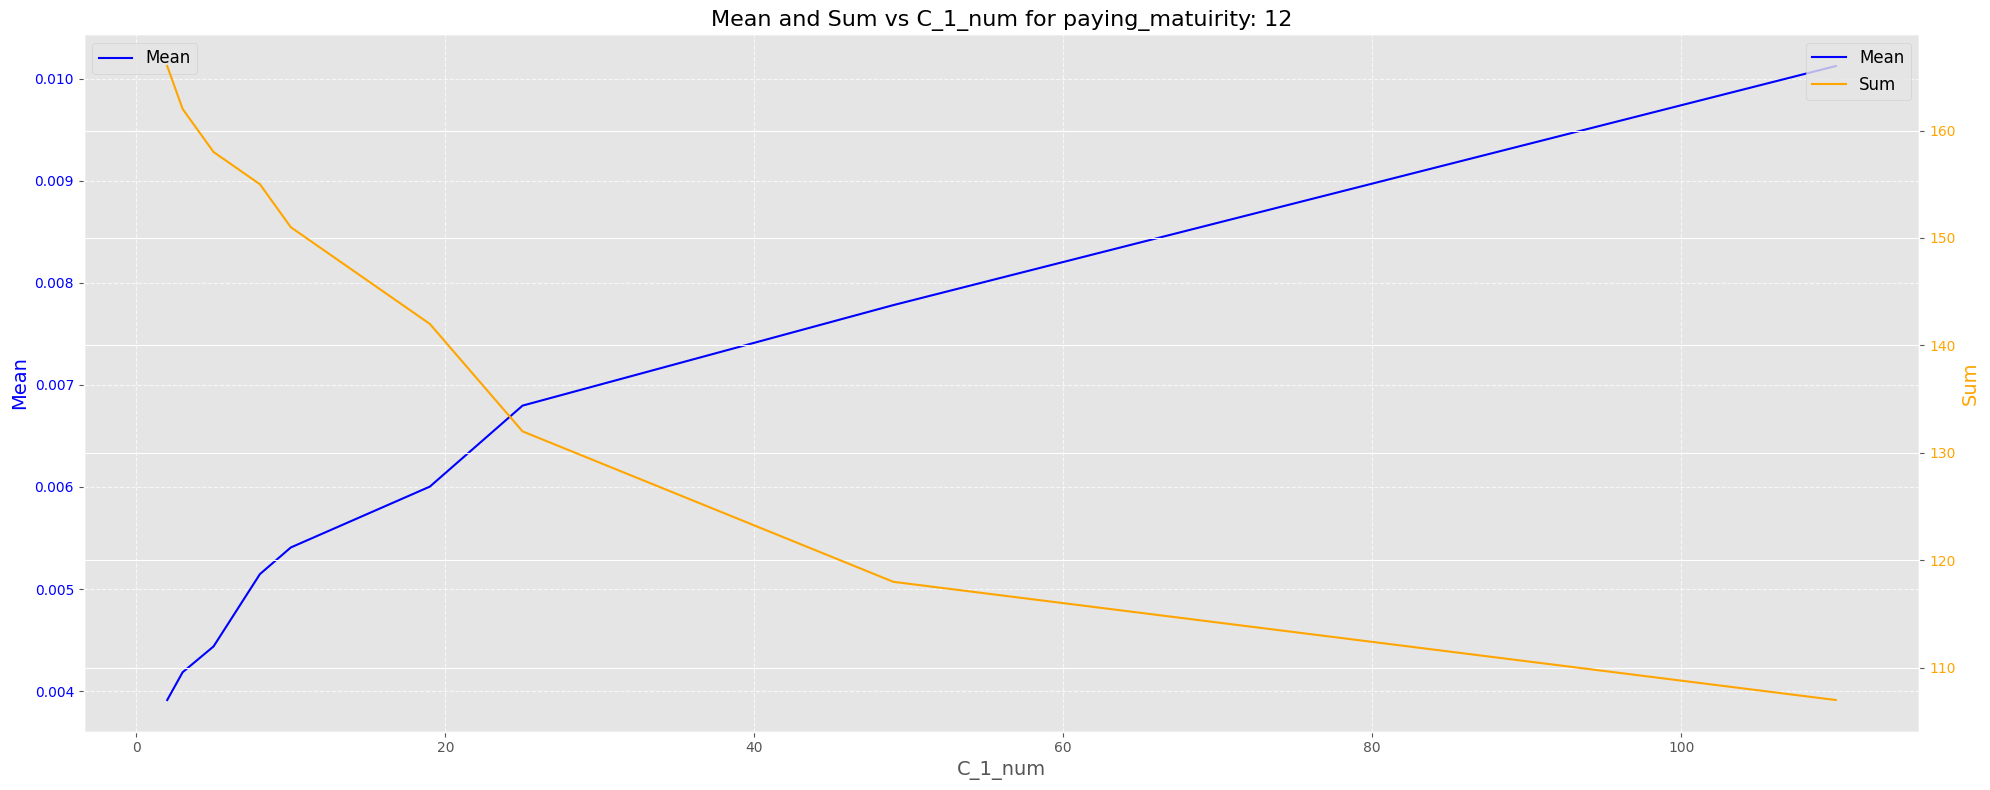

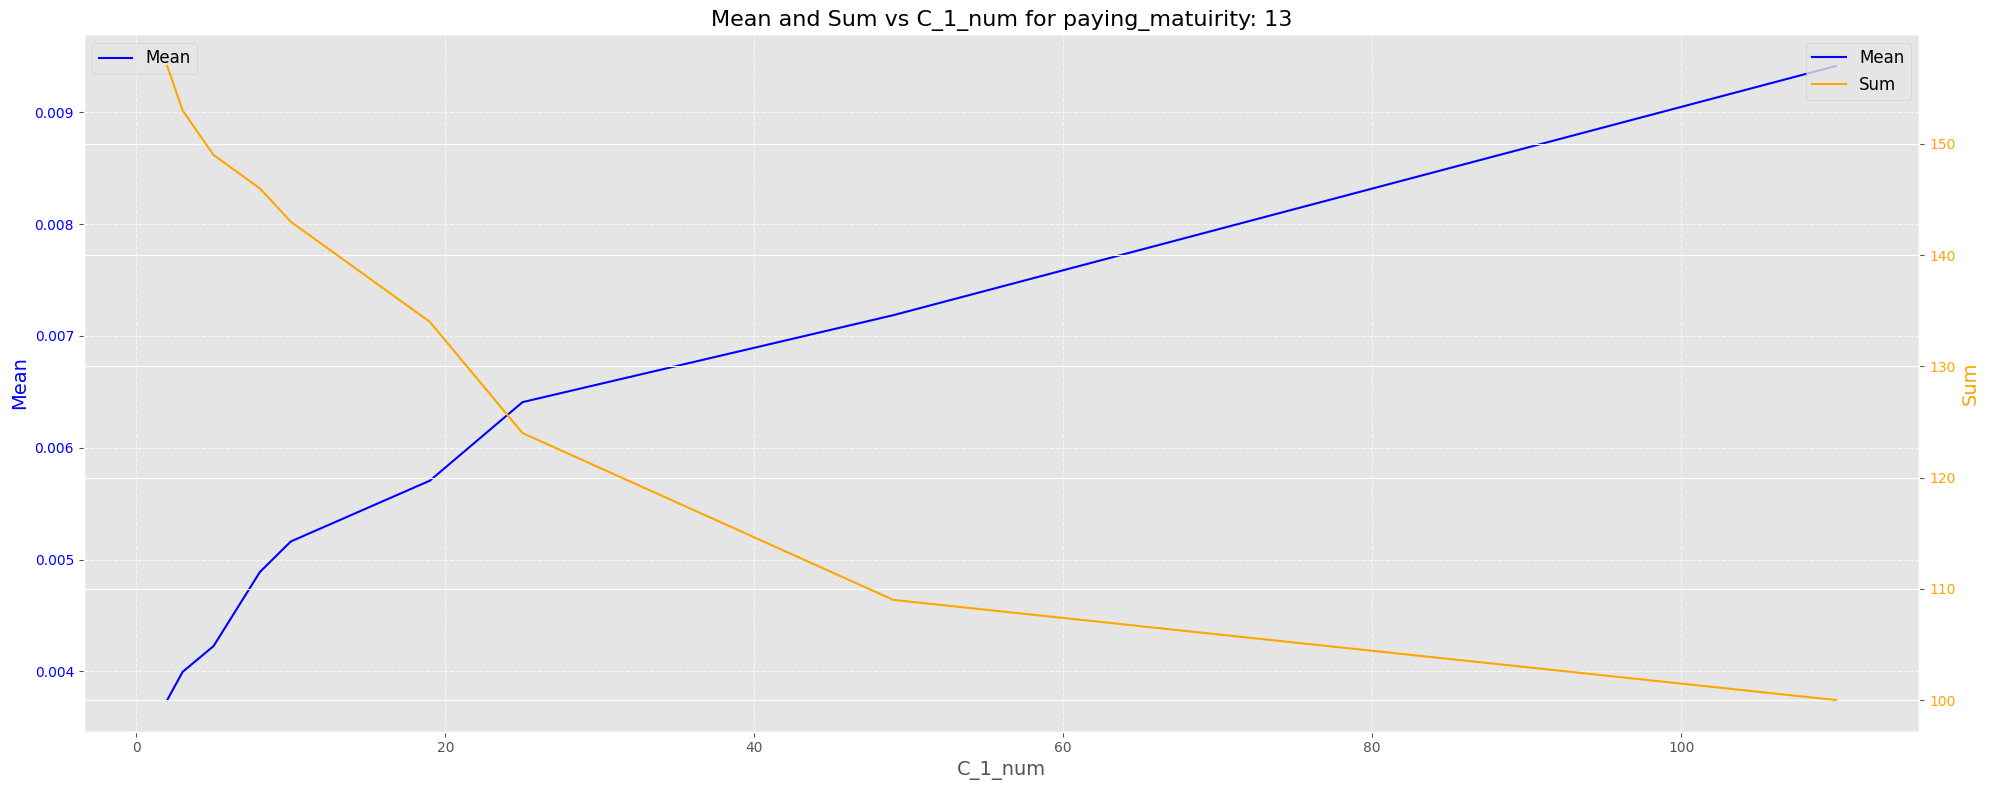

In [38]:
import matplotlib.pyplot as plt

# Set style for a professional look
plt.style.use('ggplot')

# Iterate over unique 'paying_matuirity' values
for paying_matuirity_value in result_df['paying_matuirity'].unique():
    # Filter data for current 'paying_matuirity' value
    subset_df = result_df[result_df['paying_matuirity'] == paying_matuirity_value]
    
    # Create a new figure with larger size for a professional look
    fig, ax1 = plt.subplots(figsize=(20, 8))
    
    # Plot 'C_1' against 'mean' for the current 'paying_matuirity' on the first subplot
    ax1.plot(subset_df['C_1_num'], subset_df['mean'], label='Mean', color='blue')
    
    # Set labels, title, and legend for the first subplot
    ax1.set_xlabel('C_1_num', fontsize=14)
    ax1.set_ylabel('Mean', color='blue', fontsize=14)
    ax1.set_title(f'Mean and Sum vs C_1_num for paying_matuirity: {paying_matuirity_value}', fontsize=16)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left', fontsize=12)
    
    # Create a second y-axis for the 'sum' data
    ax2 = ax1.twinx()
    
    # Plot 'C_1' against 'sum' for the current 'paying_matuirity' on the second subplot
    ax2.plot(subset_df['C_1_num'], subset_df['sum'], label='Sum', color='orange')
    
    # Set labels and legend for the second subplot
    ax2.set_ylabel('Sum', color='orange', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.legend(loc='upper right', fontsize=12)
    
    # Add labels for the 'sum' plot
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, ['Mean', 'Sum'], loc='upper right', fontsize=12)
    
    # Add grid for better readability
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent overlap
    fig.tight_layout()
    
    # Show plot
    plt.show()
